In [1]:
import torch
import numpy as np
import h5py
import librosa
import librosa.display
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
model_split = torch.load("trained_model/split_1.pth")

In [2]:
audio_source = h5py.File('H:/FAIR-Play/FAIR-Play/audio_h5/audio.h5')

In [3]:
audio = audio_source['audio'][0][:,:10080]
frame = Image.open("H:\\FAIR-Play\\FAIR-Play\\frames\\000001\\000003.png")

In [6]:
frame = frame.resize((256,128))
w, h = frame.size
frame_left = frame.crop((0,0,w/2,h))

In [4]:
def generate_spectrogram(audio):
    spectro = librosa.core.stft(audio, n_fft=512, hop_length=160, win_length=400, center=True)
    real = np.expand_dims(np.real(spectro), axis=0)
    imag = np.expand_dims(np.imag(spectro), axis=0)
    spectro_two_channel = np.concatenate((real, imag), axis=0)
    return spectro_two_channel

In [7]:
data = {}
data['audio_mix'] = torch.FloatTensor(generate_spectrogram(audio[0] + audio[1])).unsqueeze(0)
data['audio_cropped'] = torch.FloatTensor(generate_spectrogram(audio[0])).unsqueeze(0)
data['frame'] = transforms.ToTensor()(frame).unsqueeze(0)
data['frame_cropped'] = transforms.ToTensor()(frame_left).unsqueeze(0)

In [8]:
with torch.no_grad():
    out_spec = model_split(data)

AttributeError: 'VisualNetCropped' object has no attribute 'visual_conv1'

(array([  40.,   41.,   45.,   57.,   58.,   63.,   73.,   72.,   86.,
         105.,  106.,  102.,  152.,  138.,  165.,  209.,  228.,  290.,
         359.,  489.,  598.,  882., 1325., 2440., 7454., 7390., 2403.,
        1300.,  890.,  590.,  469.,  378.,  311.,  251.,  205.,  178.,
         148.,  124.,  119.,   96.,   88.,   78.,   66.,   61.,   49.,
          66.,   51.,   49.,   43.,   38.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ], dtype=float32),
 <a list of 50 Patch objects>)

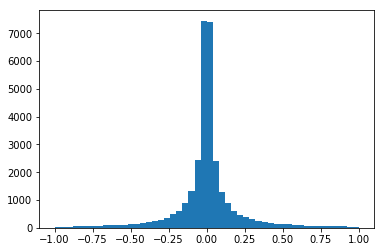

In [24]:
flat = out_spec.view(-1).cpu().numpy()
plt.figure()
plt.hist(flat, bins=50, range=(-1,1))

In [17]:
flat.shape

(32768,)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 6.0000e+00,
        6.0000e+00, 7.0000e+00, 7.0000e+00, 1.6000e+01, 3.4000e+01,
        6.6000e+01, 3.5900e+02, 1.4741e+04, 9.7700e+02, 1.1400e+02,
        4.1000e+01, 2.0000e+01, 9.0000e+00, 1.0000e+01, 4.0000e+00,
        4.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-44.819294 +15.2616205j, -42.844345 +15.23177j  ,
        -40.869396 +15.201919j , -38.894447 +15.172068j ,
        -36.919495 +15.142217j , -34.944546 +15.112365j ,
        -32.969597 +15.082514j , -30.994648 +15.052663j ,
        -29.0197   +15.022812j , -27.044748 +14.992961j ,
        -25.0698   +14.96311

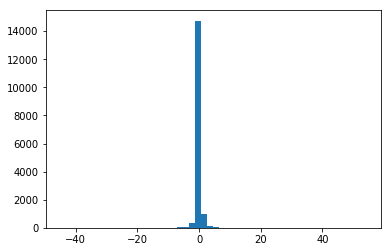

In [17]:
audio_diff = audio[0]-audio[1]
audio_diff_spec = librosa.core.stft(audio_diff, n_fft=512, hop_length=160, win_length=400, center=True)
# audio_diff_spec = np.log(audio_diff_spec)
flat = audio_diff_spec.reshape(-1)
plt.figure()
plt.hist(flat, bins=50)

(array([  86.,   65.,   75.,   71.,   88.,   88.,   99.,  110.,  102.,
         119.,  157.,  187.,  187.,  183.,  248.,  282.,  316.,  367.,
         435.,  552.,  687.,  884., 1227., 2036., 4623., 4732., 2034.,
        1259.,  864.,  693.,  546.,  424.,  343.,  310.,  272.,  219.,
         197.,  211.,  157.,  158.,  131.,  123.,  105.,  110.,  104.,
          88.,   90.,   90.,   86.,   61.]),
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.,  100.], dtype=float32),
 <a list of 50 Patch objects>)

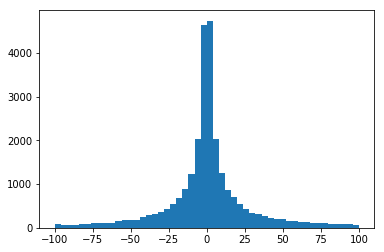

In [30]:
mix_spec = generate_spectrogram(audio[0]+audio[1])
flat = mix_spec.reshape(-1)
for i in range(len(flat)):
    if flat[i] != 0:
        flat[i] = 1/flat[i]
plt.hist(flat, bins=50, range=(-100, 100))

In [13]:
audio_diff_spec_cropped = audio_diff_spec[:-1,:]
out = librosa.istft(audio_diff_spec, hop_length=160, win_length=400, center=True, length=10080)

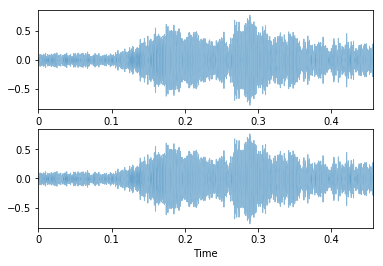

In [16]:
import librosa.display

plt.subplot(2,1,1)
librosa.display.waveplot(out, alpha=0.5)
plt.subplot(2,1,2)
librosa.display.waveplot(audio_diff, alpha=0.5)

In [11]:
mag.shape

(257, 64)

(array([240., 203., 209., 206., 156., 163., 157., 141., 122., 101.,  88.,
         78.,  68.,  41.,  35.,  35.,  35.,  51.,  37.,  38.,  17.,  12.,
         22.,  13.,  12.,   8.,   7.,  13.,   6.,   9.,  10.,   7.,   8.,
          6.,   6.,   6.,   5.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ],
       dtype=float32),
 <a list of 50 Patch objects>)

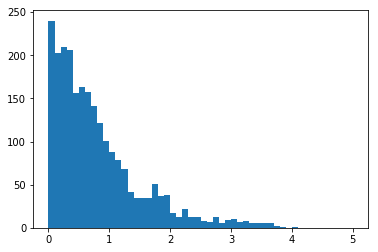

In [9]:
mag = np.abs(audio_diff_spec)
mag_log = np.log(mag)
flat = mag_log.reshape(-1,)
plt.figure()
plt.hist(flat, bins=50, range=(0,5))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 423., 502.,
        515., 496., 490., 562., 523., 518., 536., 495., 511., 510., 526.,
        519., 507., 570., 621., 493., 524., 510., 477., 523., 493., 517.,
        562., 493., 515., 525., 518., 474., 501., 499.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ], dtype=float32),
 <a list of 50 Patch objects>)

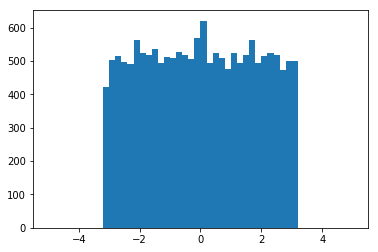

In [10]:
ang = np.angle(audio_diff_spec)
flat = ang.reshape(-1,)
plt.figure()
plt.hist(flat, bins=50, range=(-5,5))

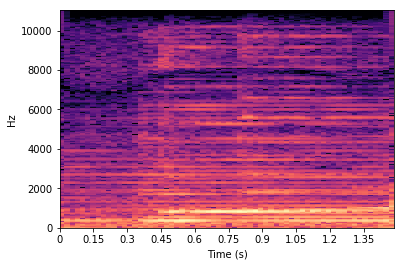

In [23]:
predicted_spectrogram_left = out_spec[0,:,:,:].data[:].cpu().numpy()
reconstructed_stft_left = predicted_spectrogram_left[0,:,:] + (1j * predicted_spectrogram_left[1,:,:])
D = librosa.amplitude_to_db(np.abs(reconstructed_stft_left), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='s')

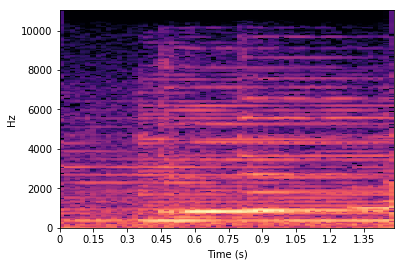

In [21]:
stft_left = librosa.core.stft(audio[0], n_fft=512, hop_length=160, win_length=400, center=True)
D = librosa.amplitude_to_db(np.abs(stft_left), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='s')

(array([  38.,   39.,   38.,   35.,   38.,   61.,   59.,   48.,   48.,
          65.,   64.,   82.,   70.,   97.,  122.,  123.,  124.,  176.,
         190.,  250.,  321.,  402.,  592., 1087., 3489., 3511., 1077.,
         616.,  417.,  315.,  245.,  189.,  148.,  151.,  111.,  116.,
         116.,   78.,   82.,   63.,   69.,   56.,   44.,   48.,   44.,
          53.,   47.,   31.,   28.,   32.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ], dtype=float32),
 <a list of 50 Patch objects>)

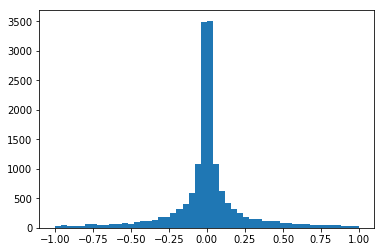

In [23]:
flat = stft_left.real.reshape(-1,)
plt.figure()
plt.hist(flat, bins=50, range=(-1,1))

In [26]:
predicted_spectrogram_left[0].mean()

-0.00057756103

In [9]:
out_spec.shape

torch.Size([1, 2, 256, 64])

In [10]:
reconstructed_signal_left = librosa.istft(reconstructed_stft_left, hop_length=160, win_length=400, center=True, length=10080)

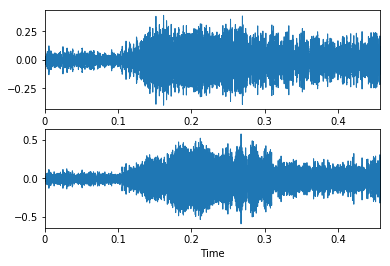

In [14]:
plt.subplot(2,1,1)
librosa.display.waveplot(reconstructed_signal_left)
plt.subplot(2,1,2)
librosa.display.waveplot(audio[0])

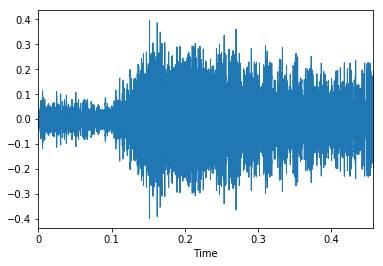

In [16]:
librosa.display.waveplot((audio[0]+audio[1])/2)

In [16]:
audio_mix = audio[0] + audio[1]
audio_mix_spec = torch.FloatTensor(generate_spectrogram(audio_mix))
audio_left_spec = torch.FloatTensor(generate_spectrogram(audio[0]))

In [19]:
ratio_mask = audio_left_spec / audio_mix_spec
ratio_mask[torch.isnan(ratio_mask)] = 0

In [25]:
ratio_mask.max()

tensor(6842.6011)

(array([  25.,   24.,   35.,   40.,   49.,   49.,   60.,   45.,   52.,
          60.,   83.,   78.,  107.,  123.,  139.,  138.,  180.,  222.,
         265.,  305.,  425.,  531.,  700.,  978., 1482., 2266., 3207.,
        4399., 4278., 3242., 2102., 1288.,  913.,  622.,  477.,  316.,
         269.,  251.,  189.,  139.,  162.,  118.,  115.,   68.,   80.,
          67.,   64.,   64.,   47.,   46.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ], dtype=float32),
 <a list of 50 Patch objects>)

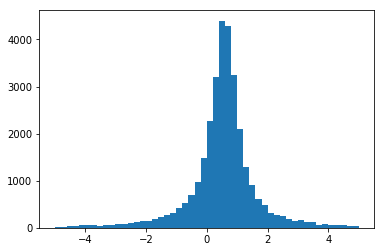

In [23]:
ratio_mask = ratio_mask.reshape(-1,)
plt.figure()
plt.hist(ratio_mask, bins=50, range=(-5,5))